In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob as gb
import cv2
# from keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.preprocessing import image_dataset_from_directory  
# from tensorflow.keras.preprocessing import image
import keras
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #,confusion_matrix,classification_report,,recall_score,precision_score,f1_score


2024-05-19 04:59:12.521659: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 04:59:12.521786: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 04:59:12.682286: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
code={'س':0,'و':1,'ظ':2,'ط':3,'غ':4,'ف':5,'ا':6,'ض':8,'ث':9,'ذ':10,'ق':12,'ش':14,'ص':16,'ب':17,'ت':19,'لا':20,'ي':22,'ج':23,'ح':24,'خ':25,'ز':27,'ه':29,'د':30,'ك':32,'م':33,'ر':34,'ل':35,'ن':36,'ع':38 }
code = {
    "ا": 0, "ب": 2, "ت": 3, "ث": 4, "ج": 5, "ح": 6, "خ": 7, "د": 8, "ذ": 9, "ر": 10,
    "ز": 11, "س": 12, "ش": 13, "ص": 14, "ض": 15, "ط": 16, "ظ": 17, "ع": 18, "غ": 19,
    "ف": 20, "ق": 21, "ك": 22, "ل": 23, "م": 24, "ن": 25, "ه": 26, "و": 27, "ي": 28
}

code = {"а": 0, "б": 2, "в": 3, "г": 4, "һ": 5, "ң": 6, "и": 7, "й": 8, "к": 9, "л": 10}
def getname(n):
    for k,v in code.items():
        if v==n:
            return k

In [5]:
code.get('ا')

In [6]:
code['ي']

KeyError: 'ي'

In [27]:
getname(5)

'ج'

# loading data

In [3]:
data=[]
data_y=[]

In [4]:
list(code.keys())

['а', 'б', 'в', 'г', 'һ', 'ң', 'и', 'й', 'к', 'л']

In [28]:
images = gb.glob('/kaggle/input/eletter'+'/*.jpg')

In [29]:
len(images)

249

In [30]:
img = images[0]
img=cv2.imread(img,0)
img=cv2.resize(img,(32,32))

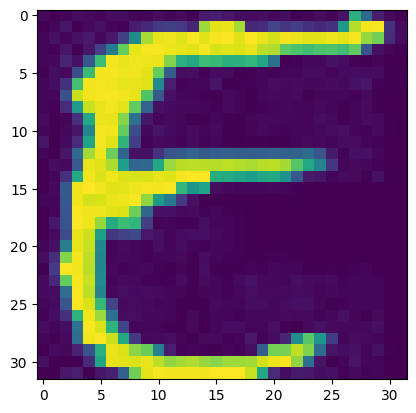

In [33]:
plt.imshow(img)

In [18]:
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

In [23]:
# norm_img = np.zeros((img.shape[0], img.shape[1]))
# after = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
# # rn_img = remove_noise(after)
# # nc_img = cv2.cvtColor(rn_img, cv2.COLOR_BGR2GRAY)
# nc_avg = np.average(after)
# c_img = cv2.cvtColor(after, cv2.COLOR_GRAY2BGR)
# inv_img = cv2.threshold(after, nc_avg*5/6, 255, cv2.THRESH_BINARY_INV) [1]
# final=cv2.cvtColor(inv_img,cv2.COLOR_GRAY2BGR)

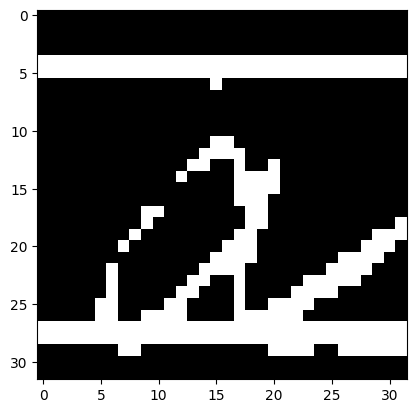

In [25]:

plt.imshow(final)

In [101]:
data = []
data_y = []
images=gb.glob(pathname=str('/kaggle/input/eletter'+'/*.jpg'))
for img in images:
    img=cv2.imread(img,0)
    img=cv2.resize(img,(64,64))
    data.append(img)
    data_y.append(1)

In [102]:

images=gb.glob(pathname=str('/kaggle/input/kletter'+'/*.jpg'))
for img in images:
    img=cv2.imread(img,0)
    img=cv2.resize(img,(64,64))
    data.append(img)
    data_y.append(0)

# show data sample

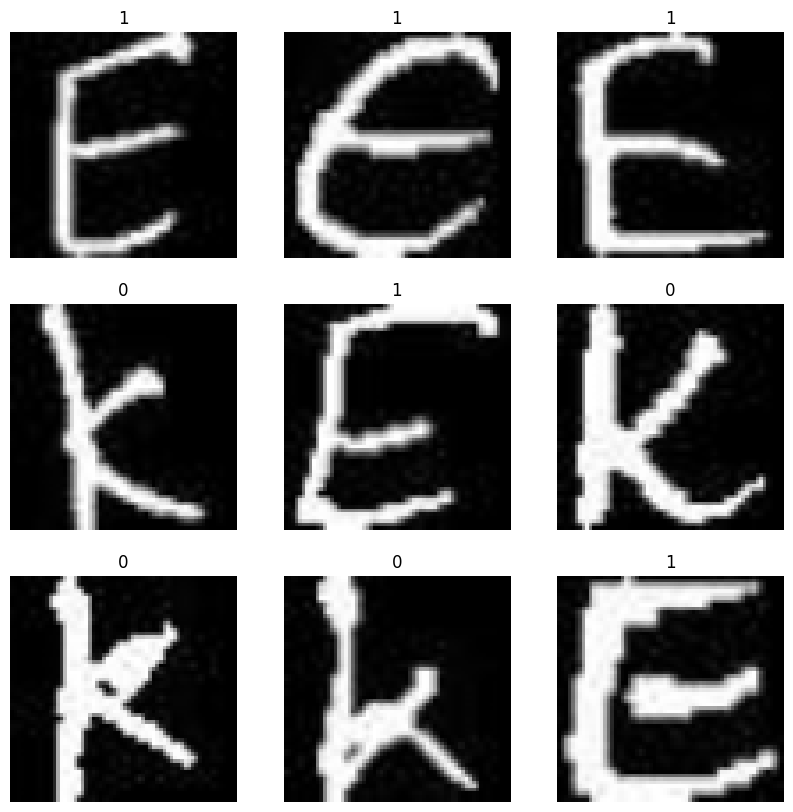

In [103]:
plt.figure(figsize=(10,10))
for i,v in enumerate(np.random.randint(0,len(data),9)):
    plt.subplot(3,3,i+1)
    plt.imshow(data[v],cmap="gray")
    plt.title(data_y[v])
    plt.axis('off')

# split data train test val

In [104]:
X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, random_state=42)

In [105]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [106]:
print(len(X_train) , len(X_test),len(X_val))

279 94 93


In [107]:
X_train[1].shape

(64, 64)

convert data to np.array

In [108]:
X_train=np.array(X_train)
y_train=np.array(y_train)

X_val=np.array(X_val)
y_val=np.array(y_val)


In [109]:
X_test=np.array(X_test)
y_test=np.array(y_test)

# **defining functions**

# function predicting and evaluating a model with train data

In [110]:
def eval_model(model_n):
    
    y_probs_n=model_n.predict(X_test)
    y_pred_n=y_probs_n.argmax(axis=1)
    y_percent_n=np.amax(y_probs_n,axis=1)

    loss_n,accuracy_n=model_n.evaluate(X_val,y_val)
    print(f'validation loss= {loss_n}')
    print(f'validation accuracy= {accuracy_n}')

    accuracy_e_n=accuracy_score(y_test,y_pred_n)
    print(f'predictiong accuracy= {accuracy_e_n}')

# function showing a plot of the predicted results

In [111]:
def plot_model_pred(model_n):
    
    y_probs_n=model_n.predict(X_test)
    y_pred_n=y_probs_n.argmax(axis=1)
    y_percent_n=np.amax(y_probs_n,axis=1)

    
    plt.figure(figsize=(10,9))
    plotnumber=1

    for i in range(1,31):
        if plotnumber <=30:
            ax=plt.subplot(5,6,plotnumber)
            plt.imshow(X_test[i],cmap='gray')
            plt.axis('off')
            plt.title('Pred: ' + getname(y_pred_n[i]) +' '+ str(round(y_percent_n[i]*100)) +'% (True: ' + getname(y_test[i]) + ')',fontdict={'fontsize':10 , 'color':('green' if y_pred_n[i]==y_test[i] else 'red')})
            plotnumber+=1
    plt.tight_layout()
    plt.show()

# function evaluation and plooting results togther 

In [141]:
def plot_eval_model_pred(model_n):
    
    y_probs_n=model_n.predict(X_test)
    y_pred_n=y_probs_n.argmax(axis=1)
    y_percent_n=np.amax(y_probs_n,axis=1)
    
    
    loss_n,accuracy_n=model_n.evaluate(X_val,y_val)
    print(f'validation loss= {loss_n}')
    print(f'validation accuracy= {accuracy_n}')

    accuracy_e_n=accuracy_score(y_test,y_pred_n)
    print(f'predictiong accuracy= {accuracy_e_n}')
    
    plt.figure(figsize=(10,9))
    plotnumber=1

    for i in range(1,31):
        if plotnumber <=30:
            ax=plt.subplot(5,6,plotnumber)
            plt.imshow(X_test[i],cmap='gray')
            plt.axis('off')
            plt.title('Pred: ' + str(y_pred_n[i]) +' '+ str(round(y_percent_n[i]*100)) +'% (True: ' + str(y_test[i]) + ')',fontdict={'fontsize':10 , 'color':('green' if y_pred_n[i]==y_test[i] else 'red')})
            plotnumber+=1
    plt.tight_layout()
    plt.show()

# function predicting one image 

In [142]:
def pred_one_img(model_n,path):
    img_1=cv2.imread(path,0)
    img_1=cv2.resize(img_1,(32,32))
    img_1=np.array(img_1)
    img_1_3d=img_1.reshape((1, 32, 32))
    img_1_prob=model_n.predict(np.array(img_1_3d))
    img_1_pred=img_1_prob.argmax(axis=1)
    plt.imshow(img_1,cmap='gray')
    plt.axis('off')
    name_1=getname(img_1_pred)
    print(name_1)

# **creating model**

In [164]:
from tensorflow import keras
import tensorflow as tf

model = keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(64, 64, 1)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    

    
    keras.layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 19, 19, 128)       8320      
                                                                 
 batch_normalization_20 (Ba  (None, 19, 19, 128)       512       
 tchNormalization)                                               
                                                                 
 conv2d_21 (Conv2D)          (None, 19, 19, 256)       819456    
                                                                 
 batch_normalization_21 (Ba  (None, 19, 19, 256)       1024      
 tchNormalization)                                               
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 9, 9, 256)         0         
 ng2D)                                                           
                                                      

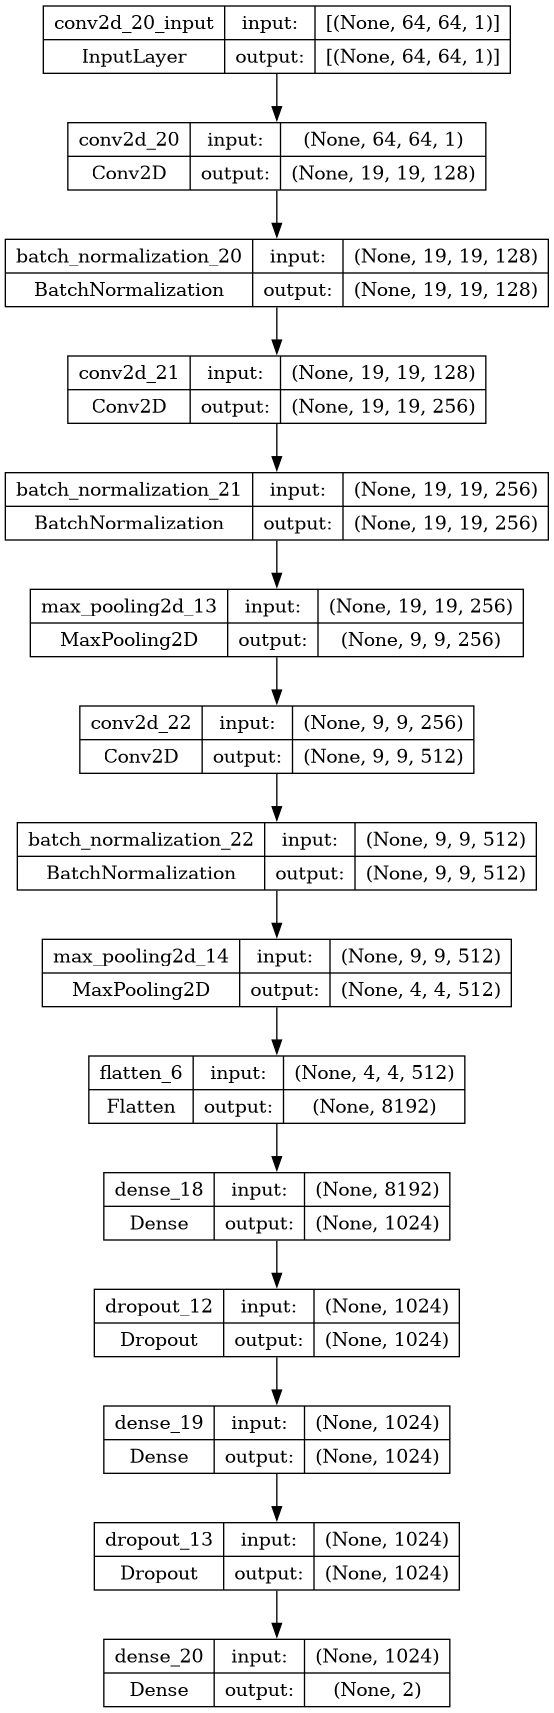

In [165]:
from keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [180]:
from keras.models import load_model
def check_char_correct(img_path, model_path, char):
    model = load_model(model_path)
    img=cv2.imread(img_path,0)
    img=cv2.resize(img,(64,64))
    lis = [img, img]
    lis = np.array(lis)
    return char == np.argmax(model.predict(lis))

In [181]:
check_char_correct('/kaggle/input/ktests/photo_2024-05-19_08-32-12.jpg', '/kaggle/working/tatar-char64.h5', 0)

1/1 [==============================] - 0s 151ms/step


False

In [168]:
es = EarlyStopping(monitor='val_loss', mode='min',patience=2)
history = model.fit(X_train,y_train,epochs=4,batch_size=16,verbose=1,validation_data =(X_val,y_val),callbacks=es)

Epoch 1/4
18/18 [==============================] - 11s 524ms/step - loss: 0.8733 - accuracy: 0.7778 - val_loss: 0.2394 - val_accuracy: 0.8925
Epoch 2/4
18/18 [==============================] - 9s 507ms/step - loss: 0.2419 - accuracy: 0.9211 - val_loss: 0.1359 - val_accuracy: 0.9785
Epoch 3/4
18/18 [==============================] - 9s 497ms/step - loss: 0.1203 - accuracy: 0.9606 - val_loss: 0.1301 - val_accuracy: 0.9570
Epoch 4/4
18/18 [==============================] - 9s 498ms/step - loss: 0.1850 - accuracy: 0.9498 - val_loss: 0.0855 - val_accuracy: 0.9785


# **Model accuracy**

3/3 [==============================] - 1s 210ms/step - loss: 0.0855 - accuracy: 0.9785
validation loss= 0.08552032709121704
validation accuracy= 0.9784946441650391
predictiong accuracy= 1.0


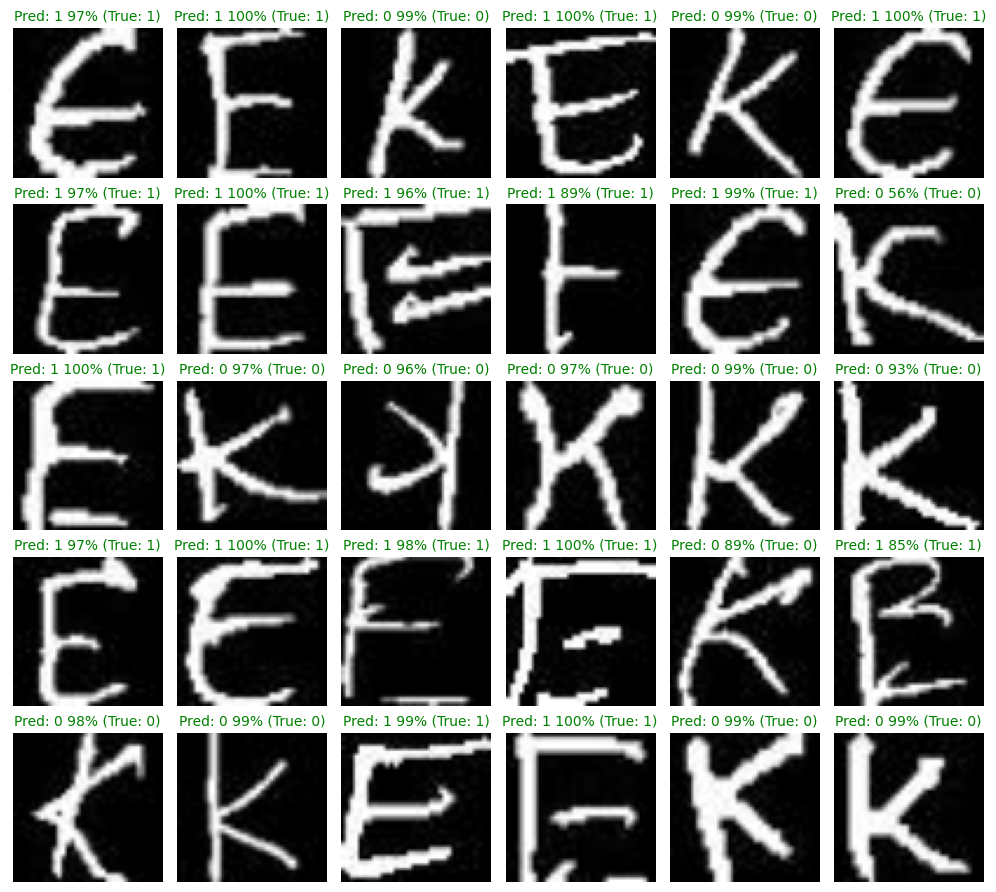

In [170]:
plot_eval_model_pred(model)

In [171]:
# pred_one_img(model,'/kaggle/input/arabic-test/arabic d
#             ataset/alf.png')

In [172]:
model.save("tatar-char64.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


array([[[ 0,  4, 12, ...,  0,  0,  0],
        [ 0,  3,  9, ...,  0,  0,  0],
        [ 0,  1,  2, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  1,  4, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  0,  0,  0],
        [ 1,  1,  0, ...,  0,  0,  0]],

       [[ 1,  1,  0, ...,  0,  0,  0],
        [ 1,  1,  0, ...,  0,  0,  0],
        [ 2,  1,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       ...,

       [[ 4,  3,  1, ...,  0,  0,  0],
        [ 3,  2,  2, ...,  0,  0,  0],
        [ 1,  2,  4, ...,  0,  0,  0],
        ...,
        [ 0,  0,  1, ...,  0,  0,  0],
        [ 0,  0,  1, ...,  0,  0,  0],
        [ 0,  0,  1, ...,  0,  0

In [120]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)  # Pick class with highest probability

# Map predicted indices to characters
labels = {idx: getname(idx) for idx in np.unique(pred)}

# Convert predicted indices to characters
pred_characters = [labels[idx] for idx in pred]


3/3 [==============================] - 1s 224ms/step


In [121]:
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1])

In [127]:
from keras.models import load_model
model = load_model('/kaggle/working/arabic-OCR4.h5')

In [128]:
model

In [154]:
img=cv2.imread('/kaggle/input/ktests/photo_2024-05-19_08-32-12.jpg',0)
img=cv2.resize(img,(64,64))
img=np.array(img)
img = np.invert(img)

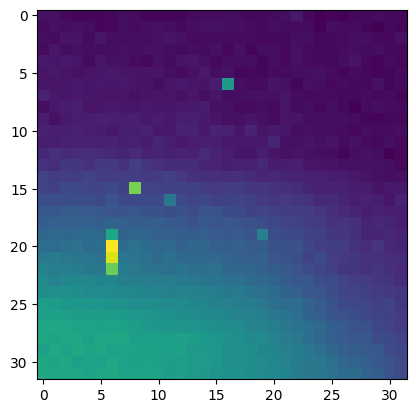

In [123]:
plt.imshow(img)

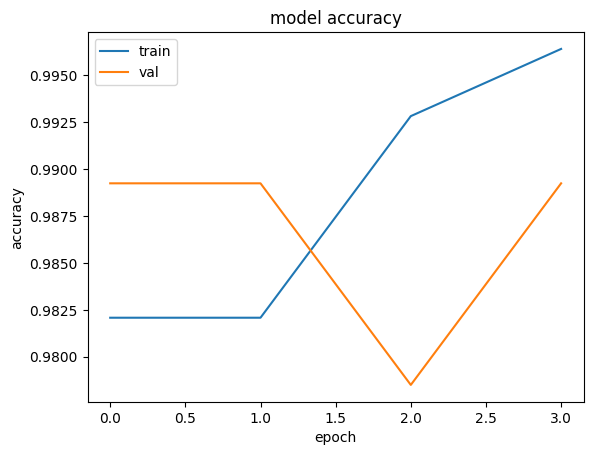

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

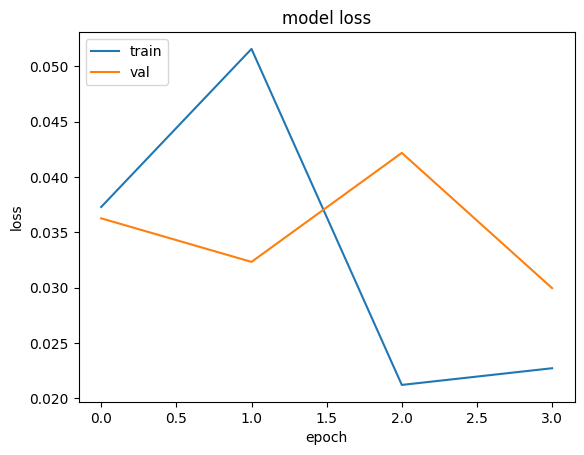

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [90]:
from keras.models import load_model

model.save('my_model.keras')

In [ ]:
from keras.models import load_model

model.save('letters_model.h5')